In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('train.csv')

In [3]:
# Let's check the first 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Let's check the dimension of the dataset
df.shape

(891, 12)

In [5]:
# Let's get the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

In [6]:
# Make the default settings of seaborn visualization
sns.set(style='whitegrid')

### Univariate Analysis

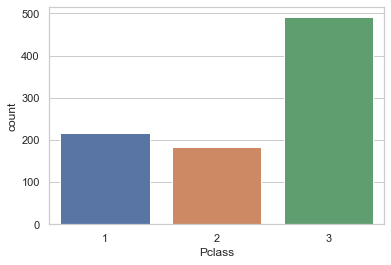

In [7]:
sns.countplot(x='Pclass', data=df)

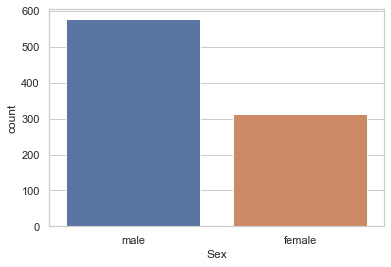

In [8]:
sns.countplot(x='Sex', data=df)

C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Age Frequency')

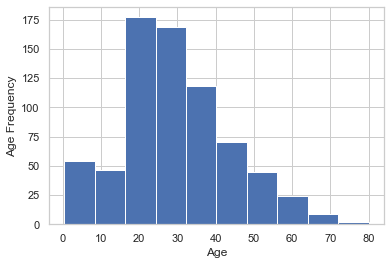

In [9]:
plt.hist(x='Age', data=df)
plt.xlabel('Age')
plt.ylabel('Age Frequency')

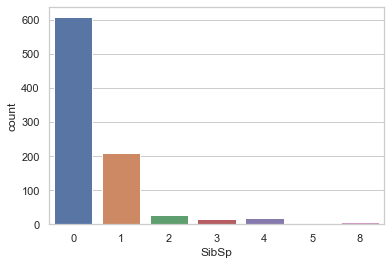

In [10]:
sns.countplot(x='SibSp', data=df)

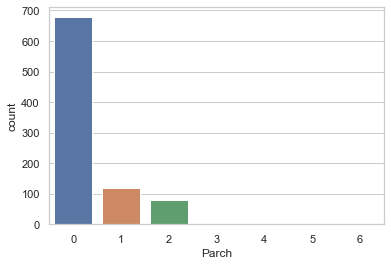

In [11]:
sns.countplot(x='Parch', data=df)

Text(0, 0.5, 'Frequency')

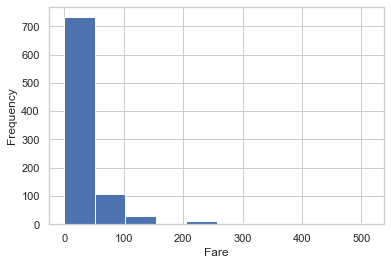

In [12]:
plt.hist(x='Fare', data=df)
plt.xlabel('Fare')
plt.ylabel('Frequency')

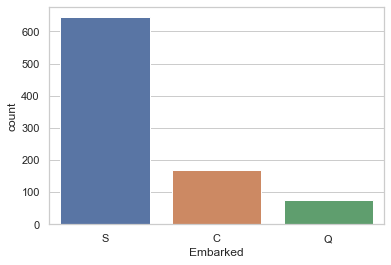

In [13]:
sns.countplot(x='Embarked', data=df)

### Bivariate Analysis

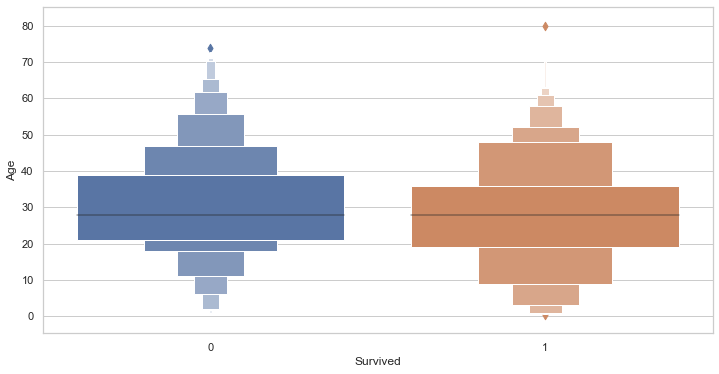

In [14]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='Survived', y='Age', data=df)
#g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='Pclass')

**Key Analysis**
- The mean age of the passengers in both survived and non-survived are almost similar.
- Majority of the children and teenagers were survived.

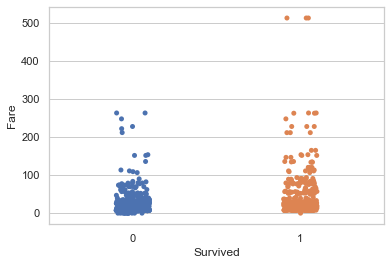

In [15]:
sns.stripplot(x='Survived', y='Fare', data=df)

**Key Analysis**
- Few of the richest passengers were survived.
- The passengers who paid fare between 100 and 200 were survived. Most of them might be women.

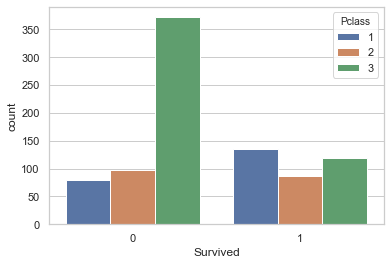

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=df)

**Key Analysis**
- Majority of the first class passengers were survived. They might have access to the life boat.
- Many of the third class passengers were died and around 100 of them were alive.
- The rate of alive and died for the second class passengers are nearly same.

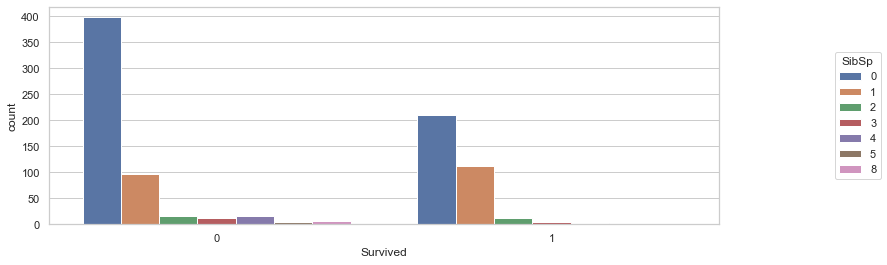

In [17]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='Survived', hue='SibSp', data=df)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='SibSp')

**Key Analysis**
- Half of the passengers who do not have siblings or spouse were alive when compared to the non-survived. Most of these passengers were travelled in the third class. It was difficult to get access to the life boat.
- The passengers who had travelled with the family member of more than 2 were dead. The life boat was limited at that time. Only few of the families were rescued.
- The ratio of alive/dead for the family with single spouse or sibling were same.

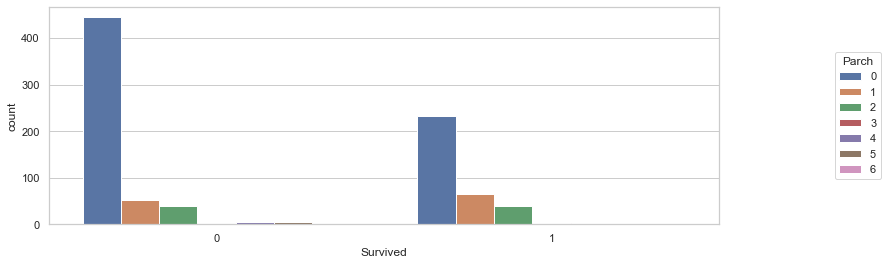

In [18]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='Survived', hue='Parch', data=df)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='Parch')

**Key Analysis**
- More than 400 passengers were not survived and they do not have parents or children on board. They were not consider as important for the rescue operation.
- Around 220 passengers were alive and they do not have parents or children. Most of the passengers might be women and first class passengers.
- The family with more than 2 were not alive. The passenger with one or two family member(s) were almost got same numbers in both alive/dead. But the passengers who survived might have children and senior citizens.

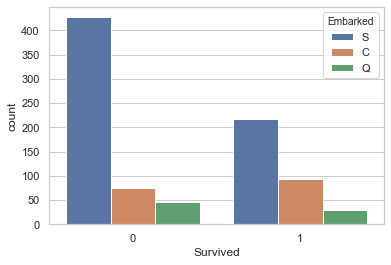

In [19]:
sns.countplot(x='Survived', hue='Embarked', data=df)

**Key Analysis**
- The passengers from Southampton were more in number in both alive and dead. Most of the third class passengers might have onboarded from this location.
- Majority of the passengers from Cherbourg were survived.
- More passengers from Queenstown were died.

### Multivariate Analysis

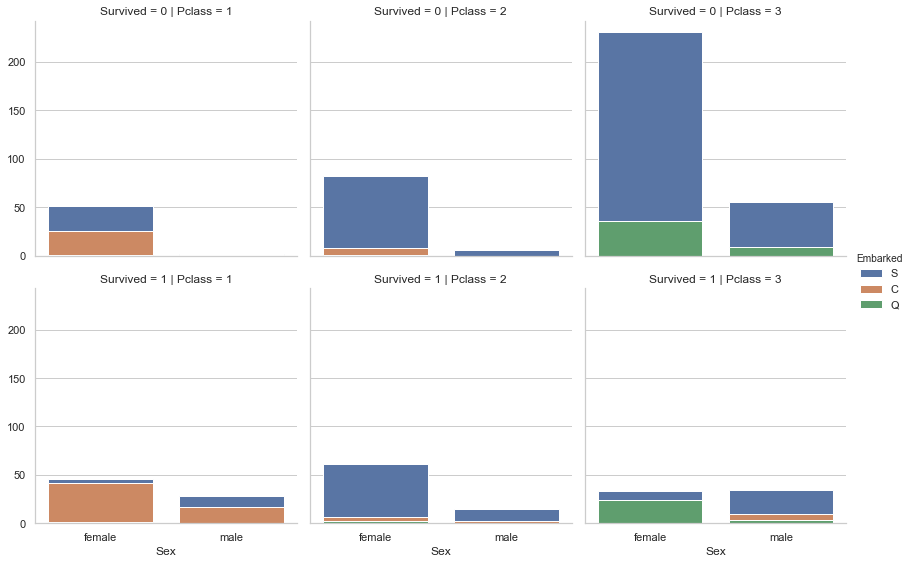

In [49]:
sns.FacetGrid(row='Survived', col='Pclass', hue='Embarked', data=df, size=4).map(sns.countplot, 'Sex').add_legend()

**Key Analysis**

**Non-Survived (Survived=0)**
- There is no first class passengers from Queenstown were travelled in the ship.
- There are equal proportion of first class women passengers from Southampton and Cherbourg were not survived.
- Few of the second class men passengers from Southampton were died and most of the women were large in number were died. Few of them from Cherbourg. There is no passengers from Queenstown.
- All the third class passengers were from Southampton and Queenstown. There are 70:30 women passengers were died respectively from Southampton and Queenstown.
- Nearly 50 third class men passengers were died.
- Majority of the women passengers were not survived from all classes.

**Survived (Survived=1)**
- Most of the richest passengers were onboarded from Cherbourg and very few from Southampton. There are nearly 30 men passengers were survived from Southampton and Cherbourg.
- Majority of the second class passengers were from Southampton. Few women and men passengers were from Cherbourg and Queenstown.
- There are equal number of men and women passengers were alive. Most of the women were onboarded from Queenstown and Southampton.
- The passengers who onboarded from Queenstown mostly without family members.

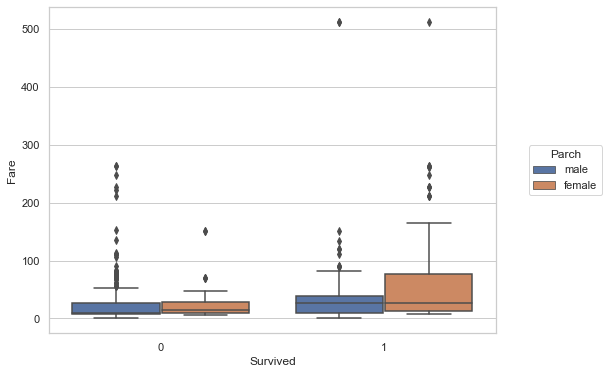

In [54]:
plt.figure(figsize=(8,6))
g = sns.boxplot(x='Survived', y ='Fare', hue='Sex', data=df)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='Parch')

**Key Analysis**
- There are high rich passengers (VIP) from both men and women sides were survived.
- Most of the women passengers were survived when compared to men.
- Second class men passengers got a tough chance to survive when compare to women passengers in the same class.

In [61]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
